# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [31]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [32]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [33]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | While BA may have made some...
1,✅ Trip Verified | British Airways new Club Sui...
2,"✅ Trip Verified | Four very pleasant, on time..."
3,Not Verified | We travel extensively over 25...
4,✅ Trip Verified | Flight delayed an hour due ...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [34]:
df

,reviews
0,✅ Trip Verified | While BA may have made some...
1,✅ Trip Verified | British Airways new Club Sui...
2,"✅ Trip Verified | Four very pleasant, on time..."
3,Not Verified | We travel extensively over 25...
4,✅ Trip Verified | Flight delayed an hour due ...
...,...
995,✅ Trip Verified | Lima to Gatwick. Helpful an...
996,✅ Trip Verified | Inverness to Auckland via Si...
997,✅ Trip Verified | I was seated right next to t...
998,"✅ Trip Verified | Flight was OK, minor delay ..."


In [35]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [36]:
df

,reviews
0,While BA may have made some positive improve...
1,British Airways new Club Suite is a marked im...
2,"Four very pleasant, on time flights with fri..."
3,We travel extensively over 25 years and ten...
4,Flight delayed an hour due to bad weather ar...
...,...
995,Lima to Gatwick. Helpful and courteous cabin...
996,Inverness to Auckland via Singapore with Brit...
997,I was seated right next to the galley and lav...
998,"Flight was OK, minor delay didn't both me. W..."


In [37]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,While BA may have made some positive improve...,While BA may have made some positive improvem...
1,British Airways new Club Suite is a marked im...,British Airways new Club Suite is a marked im...
2,"Four very pleasant, on time flights with fri...",Four very pleasant on time flights with frien...
3,We travel extensively over 25 years and ten...,We travel extensively over years and tend to ...
4,Flight delayed an hour due to bad weather ar...,Flight delayed an hour due to bad weather aro...


In [38]:
import nltk


nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /Users/jing/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jing/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jing/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,While BA may have made some positive improve...,While BA may have made some positive improvem...,"[(BA, n), (may, None), (made, v), (positive, a..."
1,British Airways new Club Suite is a marked im...,British Airways new Club Suite is a marked im...,"[(British, a), (Airways, n), (new, a), (Club, ..."
2,"Four very pleasant, on time flights with fri...",Four very pleasant on time flights with frien...,"[(Four, None), (pleasant, a), (time, n), (flig..."
3,We travel extensively over 25 years and ten...,We travel extensively over years and tend to ...,"[(travel, v), (extensively, r), (years, n), (t..."
4,Flight delayed an hour due to bad weather ar...,Flight delayed an hour due to bad weather aro...,"[(Flight, n), (delayed, v), (hour, n), (due, a..."


In [40]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,While BA may have made some positive improve...,While BA may have made some positive improvem...,"[(BA, n), (may, None), (made, v), (positive, a...",BA may make positive improvement Club World ...
1,British Airways new Club Suite is a marked im...,British Airways new Club Suite is a marked im...,"[(British, a), (Airways, n), (new, a), (Club, ...",British Airways new Club Suite marked improv...
2,"Four very pleasant, on time flights with fri...",Four very pleasant on time flights with frien...,"[(Four, None), (pleasant, a), (time, n), (flig...",Four pleasant time flight friendly helpful s...
3,We travel extensively over 25 years and ten...,We travel extensively over years and tend to ...,"[(travel, v), (extensively, r), (years, n), (t...",travel extensively year tend use BA regular ...
4,Flight delayed an hour due to bad weather ar...,Flight delayed an hour due to bad weather aro...,"[(Flight, n), (delayed, v), (hour, n), (due, a...",Flight delay hour due bad weather around JFK...


In [41]:
df[['reviews','Lemma']]

,reviews,Lemma
0,While BA may have made some positive improve...,BA may make positive improvement Club World ...
1,British Airways new Club Suite is a marked im...,British Airways new Club Suite marked improv...
2,"Four very pleasant, on time flights with fri...",Four pleasant time flight friendly helpful s...
3,We travel extensively over 25 years and ten...,travel extensively year tend use BA regular ...
4,Flight delayed an hour due to bad weather ar...,Flight delay hour due bad weather around JFK...
...,...,...
995,Lima to Gatwick. Helpful and courteous cabin...,Lima Gatwick Helpful courteous cabin crew se...
996,Inverness to Auckland via Singapore with Brit...,Inverness Auckland via Singapore British Air...
997,I was seated right next to the galley and lav...,seat right next galley lavatory aisle safety...
998,"Flight was OK, minor delay didn't both me. W...",Flight OK minor delay astonish wait hour dro...


In [42]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,While BA may have made some positive improve...,While BA may have made some positive improvem...,"[(BA, n), (may, None), (made, v), (positive, a...",BA may make positive improvement Club World ...,0.9169,Positive
1,British Airways new Club Suite is a marked im...,British Airways new Club Suite is a marked im...,"[(British, a), (Airways, n), (new, a), (Club, ...",British Airways new Club Suite marked improv...,0.6597,Positive
2,"Four very pleasant, on time flights with fri...",Four very pleasant on time flights with frien...,"[(Four, None), (pleasant, a), (time, n), (flig...",Four pleasant time flight friendly helpful s...,0.5759,Positive
3,We travel extensively over 25 years and ten...,We travel extensively over years and tend to ...,"[(travel, v), (extensively, r), (years, n), (t...",travel extensively year tend use BA regular ...,-0.6549,Negative
4,Flight delayed an hour due to bad weather ar...,Flight delayed an hour due to bad weather aro...,"[(Flight, n), (delayed, v), (hour, n), (due, a...",Flight delay hour due bad weather around JFK...,0.9613,Positive


In [43]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    473
Negative    419
Neutral     108
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x129e22720>,
 [Text(0.09319341817985852, 1.0960451572850245, 'Positive'),
  Text(-0.4526654776343259, -1.002543747353744, 'Negative'),
  Text(1.2730372827751657, -0.44930621703290835, 'Neutral')],
 [Text(0.0508327735526501, 0.5978428130645588, '47.3%'),
  Text(-0.24690844234599593, -0.546842044011133, '41.9%'),
  Text(0.8015419928584375, -0.28289650702072006, '10.8%')])

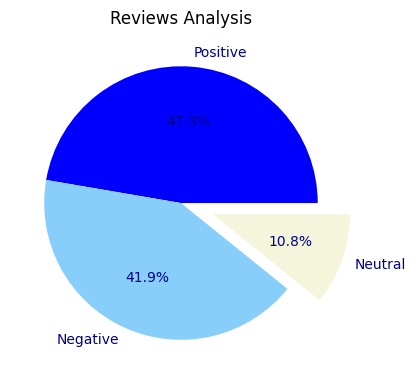

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
colors = [ 'blue', 'lightskyblue', 'beige']
textprops = {'color': 'darkblue'}
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index,colors=colors, textprops=textprops, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)


In [45]:
df.to_csv("BA_reviews.csv")

In [46]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1,
        colormap='Blues'  # Use a colormap that includes blue shades
    )

    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

# Example usage
show_wordcloud(df.Lemma)

TypeError: 'WordListCorpusReader' object is not iterable

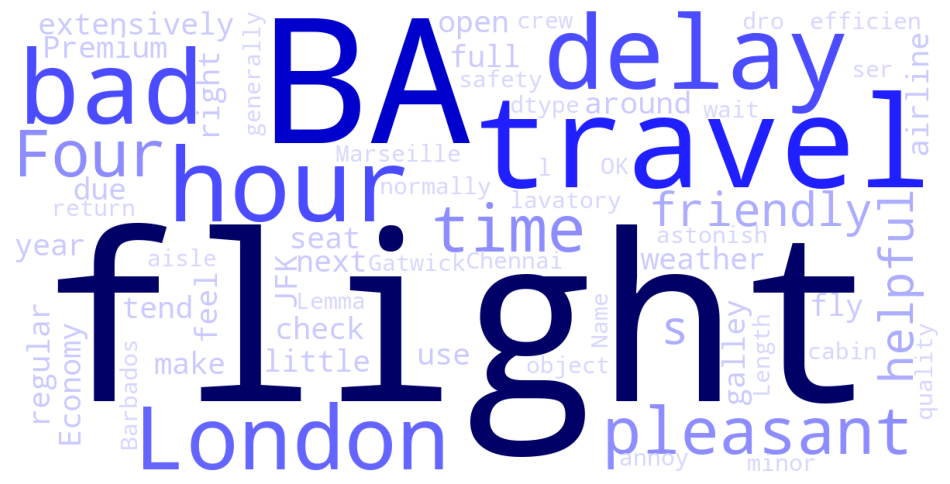

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Define a color function
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Calculate darkness of the color based on font size
    # Assuming maximum font size is 100, adjust the scale accordingly
    darkness = font_size / 100 * 0.8  # Scale darkness between 0 and 0.8
    return f"hsl(240, 100%, {100 - darkness * 100}%)"

# Set the stopwords
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=100,  # Ensure max font size is set correctly for scaling
        scale=3,
        random_state=1,
        color_func=color_func  # Use the custom color function
    )

    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

# Example usage
show_wordcloud(df.Lemma)